# Uso de la API del Ayuntamiento de Arganda del Rey sobre la concentración de ozono en el municipio

El Ayuntamiento de Arganda del Rey dispone de un [portal de datos abiertos](https://datosabiertos.ayto-arganda.es/). De los datos disponibles, usaremos los publicados sobre la concentración de ozono en el municipio. Por un lado, los datos agregados de los años 2006-2016, y posteriormente los datos por mes de 2014, 2015 y 2016, para comparar sus valores.

### Instalación de la librería necesaria
Usaremos la librería *Pandas* para trabajar los datos. La instalamos a través de `pip`, el gestor de paquetes de Python. Como es un comando que ejecutamos en la terminal, ponemos un `!` al inicio para que Jupyter lo interprete como tal.

In [1]:
!pip install pandas

### Importar *Pandas* al proyecto

In [2]:
import pandas as pd

## Análisis de la concentración de ozono anual entre 2006 y 2016

### Importamos la base de datos con la que vamos a trabajar

In [3]:
url = 'https://datosabiertos.ayto-arganda.es/dataset/b7ce7868-f873-402f-951f-ec7e5ce8b854/resource/5c34a69d-b313-4b06-8097-e1dfb81ca3ad/download/convertcsv-108.json'

### Creamos el dataframe

In [4]:
df = pd.read_json(url)
df

,Año,Ozono - ug
0,2006,{'m3': 60.75}
1,2007,{'m3': 48.16}
2,2008,{'m3': 45.08}
3,2009,{'m3': 35.66}
4,2010,{'m3': 43.75}
5,2011,{'m3': 56.16}
6,2012,{'m3': 59.75}
7,2013,{'m3': 60.72}
8,2014,{'m3': 56.66}
9,2015,{'m3': 52.83}


### Limpiamos las variables
Desde el ayuntamiento no han codificado la variable de microgramos de ozono como numérica, sino que han indicado dicha concentración por metro cúbico indicando tanto la medida (m3) como el dato, por lo que Python no sabrá interpretarlo a la hora de hacer un gráfico. Por ello, reasignamos los valores manteniendo únicamente el valor numérico. Lo hacemos a través de `df.at[]`, donde, entre corchetes, indicamos primero el número de fila y luego el nombre de la columna, para posteriormente indicar el valor que queremos asignar.

In [5]:
df.at[0, 'Ozono - ug']=60.75
df.at[1, 'Ozono - ug']=48.16
df.at[2, 'Ozono - ug']=45.08
df.at[3, 'Ozono - ug']=35.66
df.at[4, 'Ozono - ug']=43.75
df.at[5, 'Ozono - ug']=56.16
df.at[6, 'Ozono - ug']=59.75
df.at[7, 'Ozono - ug']=60.72
df.at[8, 'Ozono - ug']=56.66
df.at[9, 'Ozono - ug']=52.83
df.at[10, 'Ozono - ug']=54.50

Ahora, comprobamos que se ha recodificado bien mostrando el dataframe con `df`.

In [6]:
df

,Año,Ozono - ug
0,2006,60.75
1,2007,48.16
2,2008,45.08
3,2009,35.66
4,2010,43.75
5,2011,56.16
6,2012,59.75
7,2013,60.72
8,2014,56.66
9,2015,52.83


Si queremos explorar más en profundidad algunos datos de la tabla, podemos ver datos concretos, solo los primeros, los últimos... Lo hacemos con `df.head()` para ver X valores empezando por la cabecera, con `df.tail()` por el final o con `df.info()` para ver datos generales.

In [7]:
df.head(2)

,Año,Ozono - ug
0,2006,60.75
1,2007,48.16


In [8]:
df.tail(3)

,Año,Ozono - ug
8,2014,56.66
9,2015,52.83
10,2016,54.5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Año         11 non-null     int64 
 1   Ozono - ug  11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


### Visualizando la concentración de ozono en Arganda del Rey (2006-2016)

Una vez hemos limpiado las variables y explorado el dataframe, vamos a mostrar visualmente estos datos, para así hacernos una idea de la evolución de la concentración de ozono, medida por metro cúbico, en el municipio de Arganda del Rey en los años comprendidos entre 2006 y 2016, ambos inclusive. 
Añadimos el valor `ylabel="m3"` para ofrecer la medida de los valores del eje de las y, que muestran la concentración por m3 de Ozono.

<AxesSubplot:title={'center':'Concentración de ozono en Arganda del Rey'}, xlabel='Año', ylabel='m3'>

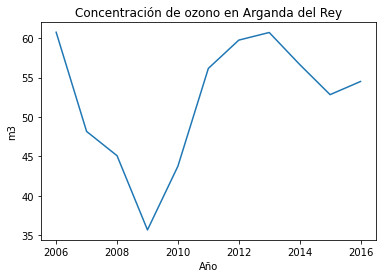

In [10]:
df.set_index('Año')['Ozono - ug'].plot(title="Concentración de ozono en Arganda del Rey",ylabel="m3")

## Análisis por año: 2014, 2015 y 2016
Ahora, pasaremos a analizar los datos mes a mes de tres años diferentes (2014, 2015 y 2016), para posteriormente hacer una comparación entre ellos. Seguimos usando el [portal de datos abiertos de Arganda del Rey](https://datosabiertos.ayto-arganda.es/) para obtener las bases de datos.

### Año 2014
Tal y como realizamos con la base de datos de 2006 a 2016, primero vamos a importar, a través de la API de Arganda del Rey, la base de datos correspondiente al primer año de los que vamos a analizar, 2014.

In [11]:
url_14 = 'https://datosabiertos.ayto-arganda.es/dataset/1cf5b526-a132-4240-b1eb-63c110284136/resource/844f00c7-f002-46f2-b4b0-e1eb578dd2a6/download/convertcsv-107.json'

Creamos el dataframe a partir de la variable `url_14` y vemos sus datos.

In [12]:
df_14 = pd.read_json(url_14)
df_14

,Mes,Ozono ug
0,01| 2014,{'m3': 45}
1,02| 2014,{'m3': 53}
2,03| 2014,{'m3': 63}
3,04| 2014,{'m3': 65}
4,05| 2014,{'m3': 79}
5,06| 2014,{'m3': 71}
6,07| 2014,{'m3': 80}
7,08| 2014,{'m3': 75}
8,09| 2014,{'m3': 58}
9,10| 2014,{'m3': 37}


In [13]:
df_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Mes       12 non-null     object
 1   Ozono ug  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


In [14]:
df_14.describe()

,Mes,Ozono ug
count,12,12
unique,12,12
top,01| 2014,{'m3': 45}
freq,1,1


#### Limpiamos los datos 
De nuevo, tal y como sucedió con la base de datos de 2006 a 2016, los valores de la concentración de ozono no son numéricos, como tampoco lo son los de los meses, que vienen codificados como `mm|aaaa`. Vamos a transformarlos a solo `mm`, pues posteriormente, cuando los mostremos, el año del que se traten los datos ya vendrá con un color diferenciado.

Primero recodificamos los datos de la concentración de ozono...

In [15]:
df_14.at[0, 'Ozono ug']=45
df_14.at[1, 'Ozono ug']=53
df_14.at[2, 'Ozono ug']=63
df_14.at[3, 'Ozono ug']=65
df_14.at[4, 'Ozono ug']=79
df_14.at[5, 'Ozono ug']=71
df_14.at[6, 'Ozono ug']=80
df_14.at[7, 'Ozono ug']=75
df_14.at[8, 'Ozono ug']=58
df_14.at[9, 'Ozono ug']=37
df_14.at[10, 'Ozono ug']=35
df_14.at[11, 'Ozono ug']=19

In [16]:
df_14

,Mes,Ozono ug
0,01| 2014,45
1,02| 2014,53
2,03| 2014,63
3,04| 2014,65
4,05| 2014,79
5,06| 2014,71
6,07| 2014,80
7,08| 2014,75
8,09| 2014,58
9,10| 2014,37


... y luego los de los meses.

In [17]:
df_14.at[0, 'Mes']=1
df_14.at[1, 'Mes']=2
df_14.at[2, 'Mes']=3
df_14.at[3, 'Mes']=4
df_14.at[4, 'Mes']=5
df_14.at[5, 'Mes']=6
df_14.at[6, 'Mes']=7
df_14.at[7, 'Mes']=8
df_14.at[8, 'Mes']=9
df_14.at[9, 'Mes']=10
df_14.at[10, 'Mes']=11
df_14.at[11, 'Mes']=12

In [18]:
df_14

,Mes,Ozono ug
0,1,45
1,2,53
2,3,63
3,4,65
4,5,79
5,6,71
6,7,80
7,8,75
8,9,58
9,10,37


#### Generamos el gráfico del año 2014

Una vez que tenemos los datos listos y recodificamos, vamos a mostrarlos gráficamente. Para ello, fijamos los ejes, el título del gráfico y la etiqueta del eje de las y, para especificar que es la concentración por metro cúbico.

<AxesSubplot:title={'center':'Concentración de ozono'}, xlabel='Mes', ylabel='m3'>

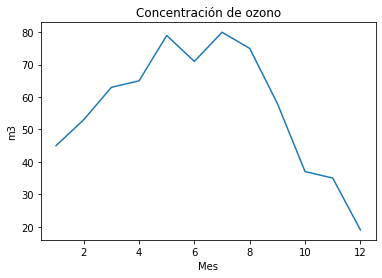

In [19]:
df_14.set_index('Mes')['Ozono ug'].plot(title="Concentración de ozono", ylabel="m3")

### Año 2015
De igual manera que con el año 2014, importamos la base de datos de los registros de concentración de ozono en Arganda del Rey en 2015.

In [20]:
url_15 = 'https://datosabiertos.ayto-arganda.es/dataset/bd39d02d-10c0-4d6d-a0dc-cff1b77692a6/resource/566164ff-9757-4b50-91d9-d8b83bca7c6f/download/convertcsv-106.json'
df_15 = pd.read_json(url_15)
df_15

,Mes,Ozono ug
0,01|2015,{'m3': 26}
1,02|2015,{'m3': 48}
2,03|2015,{'m3': 46}
3,04|2015,{'m3': 64}
4,05|2015,{'m3': 71}
5,06|2015,{'m3': 86}
6,07|2015,{'m3': 79}
7,08|2015,{'m3': 72}
8,09|2015,{'m3': 61}
9,10|2015,{'m3': 41}


In [21]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Mes       12 non-null     object
 1   Ozono ug  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


#### Limpiamos y recodificamos los valores
De la misma forma, siguen sin estar codificados como numéricos los valores, así que tenemos que limpiar las variables y recodificarlos como tal para poder hacer el gráfico.

Primero, la concentración de ozono.

In [22]:
df_15.at[0, 'Ozono ug']=26
df_15.at[1, 'Ozono ug']=48
df_15.at[2, 'Ozono ug']=46
df_15.at[3, 'Ozono ug']=64
df_15.at[4, 'Ozono ug']=71
df_15.at[5, 'Ozono ug']=86
df_15.at[6, 'Ozono ug']=79
df_15.at[7, 'Ozono ug']=72
df_15.at[8, 'Ozono ug']=61
df_15.at[9, 'Ozono ug']=41
df_15.at[10, 'Ozono ug']=25
df_15.at[11, 'Ozono ug']=15

Luego, los meses del año como valor numérico.

In [23]:
df_15.at[0, 'Mes']=1
df_15.at[1, 'Mes']=2
df_15.at[2, 'Mes']=3
df_15.at[3, 'Mes']=4
df_15.at[4, 'Mes']=5
df_15.at[5, 'Mes']=6
df_15.at[6, 'Mes']=7
df_15.at[7, 'Mes']=8
df_15.at[8, 'Mes']=9
df_15.at[9, 'Mes']=10
df_15.at[10, 'Mes']=11
df_15.at[11, 'Mes']=12

#### Generamos el gráfico para los valores de 2015

Al igual que hicimos anteriormente, especificamos, a través de `ylabel="m3"`, la leyenda del eje de las y.

<AxesSubplot:title={'center':'Concentración de ozono'}, xlabel='Mes', ylabel='m3'>

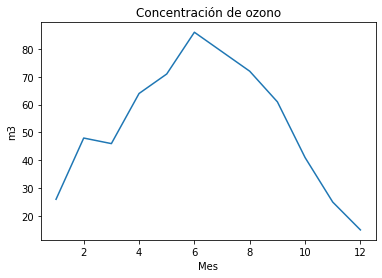

In [24]:
df_15.set_index('Mes')['Ozono ug'].plot(title="Concentración de ozono", ylabel="m3")

### Año 2016
De la misma manera, repetimos el procedimiento que hemos hecho con los años anteriores para 2016.

In [25]:
url_16 = 'https://datosabiertos.ayto-arganda.es/dataset/1b6a99e0-1588-4e8e-aa93-f81c007ef424/resource/9e7635c0-0e0d-4884-8ce0-6143e11be9a8/download/convertcsv-105.json'
df_16 = pd.read_json(url_16)
df_16

,Mes,Ozono ug
0,01| 2016,{'m3': 30}
1,02| 2016,{'m3': 48}
2,03| 2016,{'m3': 57}
3,04| 2016,{'m3': 65}
4,05| 2016,{'m3': 70}
5,06| 2016,{'m3': 73}
6,07| 2016,{'m3': 85}
7,08| 2016,{'m3': 77}
8,09| 2016,{'m3': 59}
9,10| 2016,{'m3': 39}


In [26]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Mes       12 non-null     object
 1   Ozono ug  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


#### Limpiamos los datos
Como sucedió con los años anteriores, tenemos que limpiar las variables y recodificar los datos para convertirlos en numéricos para poder visualizarlos en un gráfico.

Recodificamos los valores de la concentración de ozono:

In [27]:
df_16.at[0, 'Ozono ug']=30
df_16.at[1, 'Ozono ug']=48
df_16.at[2, 'Ozono ug']=57
df_16.at[3, 'Ozono ug']=65
df_16.at[4, 'Ozono ug']=70
df_16.at[5, 'Ozono ug']=73
df_16.at[6, 'Ozono ug']=85
df_16.at[7, 'Ozono ug']=77
df_16.at[8, 'Ozono ug']=59
df_16.at[9, 'Ozono ug']=39
df_16.at[10, 'Ozono ug']=31
df_16.at[11, 'Ozono ug']=20

Hacemos lo propio con los meses del año.

In [28]:
df_16.at[0, 'Mes']=1
df_16.at[1, 'Mes']=2
df_16.at[2, 'Mes']=3
df_16.at[3, 'Mes']=4
df_16.at[4, 'Mes']=5
df_16.at[5, 'Mes']=6
df_16.at[6, 'Mes']=7
df_16.at[7, 'Mes']=8
df_16.at[8, 'Mes']=9
df_16.at[9, 'Mes']=10
df_16.at[10, 'Mes']=11
df_16.at[11, 'Mes']=12

In [29]:
df_16

,Mes,Ozono ug
0,1,30
1,2,48
2,3,57
3,4,65
4,5,70
5,6,73
6,7,85
7,8,77
8,9,59
9,10,39


#### Visualizamos los datos de 2016
Una vez recodificados como numéricos los valores, mostramos el gráfico tal y como lo hemos hecho las veces anteriores, añadiendo `ylabel="m3"` a la leyenda del eje de las y.

<AxesSubplot:title={'center':'Concentración de ozono'}, xlabel='Mes', ylabel='m3'>

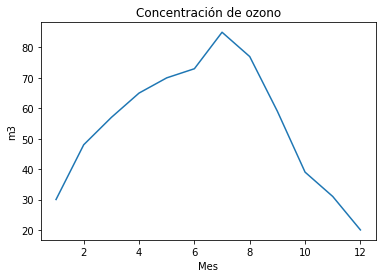

In [30]:
df_16.set_index('Mes')['Ozono ug'].plot(title="Concentración de ozono", ylabel="m3")

## Comparación unificada de los años 2014, 2015 y 2016
Una vez que hemos visto estos tres años por separado, ahora vamos a unificarlos en un solo gráfico para ver, de forma más visual y sencilla, la evolución de la concentración de ozono en Arganda del Rey en 2014, 2015 y 2016.

Primero, creamos las nuevas variables, fijando ya los valores que hemos recodificado.

In [31]:
ozono_14 = df_14.set_index('Mes')['Ozono ug']
ozono_15 = df_15.set_index('Mes')['Ozono ug']
ozono_16 = df_16.set_index('Mes')['Ozono ug']

A través de la concatenación, disponible en la librería *Pandas*, creamos una nueva variable que unifique los tres años.

In [32]:
vs = pd.concat([ozono_14, ozono_15, ozono_16],axis=1)
vs

,Ozono ug,Ozono ug,Ozono ug
Mes,,,
1,45,26,30
2,53,48,48
3,63,46,57
4,65,64,65
5,79,71,70
6,71,86,73
7,80,79,85
8,75,72,77
9,58,61,59


Cambiamos el nombre de las columnas para que muestre el año al que pertenecen los datos.

In [33]:
vs.columns = ['2014', '2015', '2016']
vs

,2014,2015,2016
Mes,,,
1,45,26,30
2,53,48,48
3,63,46,57
4,65,64,65
5,79,71,70
6,71,86,73
7,80,79,85
8,75,72,77
9,58,61,59


### Visualización conjunta

Ahora sí, mostramos el gráfico con todos los datos de los tres años unificados en uno solo, siguiendo la misma fórmula que hemos empleado en los gráficoso anteriores de añadir `ylabel="m3"` para la leyenda del eje de las y. No hace falta especificar `set_index` porque ya lo hicimos cuando unificamos las tres bases de datos al crear las variables de ozono por año para luego crear la concatenación en `vs`.

<AxesSubplot:title={'center':'Concentración de ozono (m3) en 2014, 2015 y 2016'}, xlabel='Mes', ylabel='m3'>

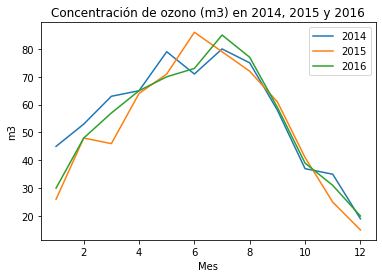

In [34]:
vs.plot(title="Concentración de ozono (m3) en 2014, 2015 y 2016", ylabel="m3")

Alternativa por áreas:

<AxesSubplot:title={'center':'Concentración de ozono (m3) en 2014, 2015 y 2016'}, xlabel='Mes'>

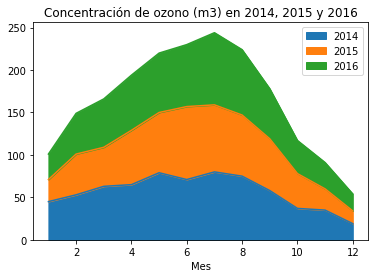

In [35]:
vs.plot(title="Concentración de ozono (m3) en 2014, 2015 y 2016", kind='area')

### Exportamos los datos como .csv y el gráfico como .png

Ahora, para facilitar el uso de los datos que hemos tratado y recodificado, vamos a exportarlo como archivo separado por comas (`.csv`), a través de `to_csv()`, donde en los paréntesis especificamos el nombre del archivo.

In [42]:
vs.to_csv('practica-4.csv')

Verificamos que lo hemos exportado haciendo un `!ls` para ver los archivos de nuestra carpeta de JupyterHub.

In [43]:
!ls

api-pandas-folium.ipynb     python-api-covid19-pandas-Copy1.ipynb
esvsit.csv		    python-api-covid19-pandas.ipynb
esvsit.png		    python-api-ozono-arganda-pandas.ipynb
ozono-arganda-14-15-16.csv  python-pruebas.ipynb
ozono-arganda-14-15-16.png  Shared_Resources
practica-4.csv		    Untitled1.ipynb
practica-4.png		    Untitled.ipynb
pruebas-r.ipynb


Para exportar el gráfico como `.png`, tenemos que importar la librería `matplotlib`, concretamente dentro de esta, `pyplot`, y lo importamos como `plt`. Luego, volvemos a mostrar el gráfico para decirle a `pyplot` cuál es el gráfico que queremos guardar como `.png`. Luego, lo guardamos a través de `plt.savefig()`, y entre los paréntesis especificamos el nombre del archivo.

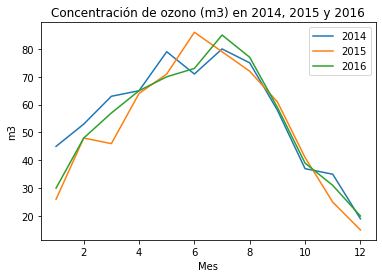

In [40]:
import matplotlib.pyplot as plt
vs.plot(title="Concentración de ozono (m3) en 2014, 2015 y 2016", ylabel="m3")
plt.savefig('practica-4.png')

In [41]:
!ls

api-pandas-folium.ipynb     python-api-covid19-pandas-Copy1.ipynb
esvsit.csv		    python-api-covid19-pandas.ipynb
esvsit.png		    python-api-ozono-arganda-pandas.ipynb
ozono-arganda-14-15-16.csv  python-pruebas.ipynb
ozono-arganda-14-15-16.png  Shared_Resources
practica-4.png		    Untitled1.ipynb
pruebas-r.ipynb		    Untitled.ipynb
